## TALLER MODULO 5, PREDICCIONES

REALIZAR REGRESION SIMPLE Y LOGISTICA PARA PREDECIR LA SATISFACCION DE LOS CLIENTES CON RESPECTO A LAS VARIABLES DE LA ENCUESTA. 

En primera instancia se importan las librerias a utilizar, se instala desde el cmd sklearn y se hacen los ajustes pertienentes. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, lars_path
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve,f1_score, roc_auc_score, roc_curve, log_loss,classification_report

from ipywidgets import interactive

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Cargamos la base de datos

In [3]:
df = pd.read_csv('Invistico_Airline.csv')

In [4]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


Se hace una revision de los datos, con la info, las estadisticas con describe, y en si se analiza toda la base de datos, como ya se hizo anteriormente en un taller el analisis explotratorio de los datos, se sabe de la naturaleza de los datos, los datos mas relevantes y demas informacion pertienente a la hora de modelar

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

## LIMPIEZA DE DATOS

definir variable a predeccir: satisfaction, para asi determinar las variables que inciden en la satisfaccion de los clientes de la aerolinea. 

Convertir variables dummys, tanto independeitne como independientes
Crear nueva dataset con variables a utilizar y para utilizar en modelo
Revisar variables que se salen de los parametros

In [6]:
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].astype('float')

In [8]:
df['satisfaction'] = df['satisfaction'].map({'satisfied':1,'dissatisfied':0})
df = df.reset_index()
df = df.drop('index',axis=1)

In [9]:
df['satisfaction'].value_counts(normalize=True)

1    0.547328
0    0.452672
Name: satisfaction, dtype: float64

Debido a que la variable clase tiene 3 opciones, tambien se convierte en dummie para simplificar los analisis, sumando asi la eco plus con la eco, dejando asi en esta variable solo 2 opciones, business y eco. 

In [10]:
df['Class'] = df['Class'].map({'Eco':'Economy','Eco Plus':'Economy','Business':'Business'})

In [11]:
df1 = pd.get_dummies(df,columns=['Gender','Customer Type','Type of Travel','Class'],drop_first=True)
df1

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Economy
0,1,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0.0,0.0,0,0,1,1
1,1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310.0,305.0,1,0,1,0
2,1,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0.0,0.0,0,0,1,1
3,1,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0.0,0.0,0,0,1,1
4,1,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0.0,0.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,29,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0.0,0.0,0,1,1,1
129876,0,63,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174.0,172.0,1,1,1,0
129877,0,69,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155.0,163.0,1,1,1,1
129878,0,66,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193.0,205.0,1,1,1,1


In [13]:
group = df1.groupby(['satisfaction','Class_Economy'])['Class_Economy'].count()
group

satisfaction  Class_Economy
0             0                18065
              1                40728
1             0                44095
              1                26992
Name: Class_Economy, dtype: int64

Teniendo la variable de satisfaction, convertida en dummie junto con la clase, la agrupamos,  y hacemos los graficos kernel para ver que  funciones no contribuyen a la creación de nuestros modelos predictivos. Tood ello gracias al grafico kernel podemos identificar la distribucion de los datos en las diferentes variables. Es asi como podemos observar como esta segmentada nuestra data en cada una de las variables. 

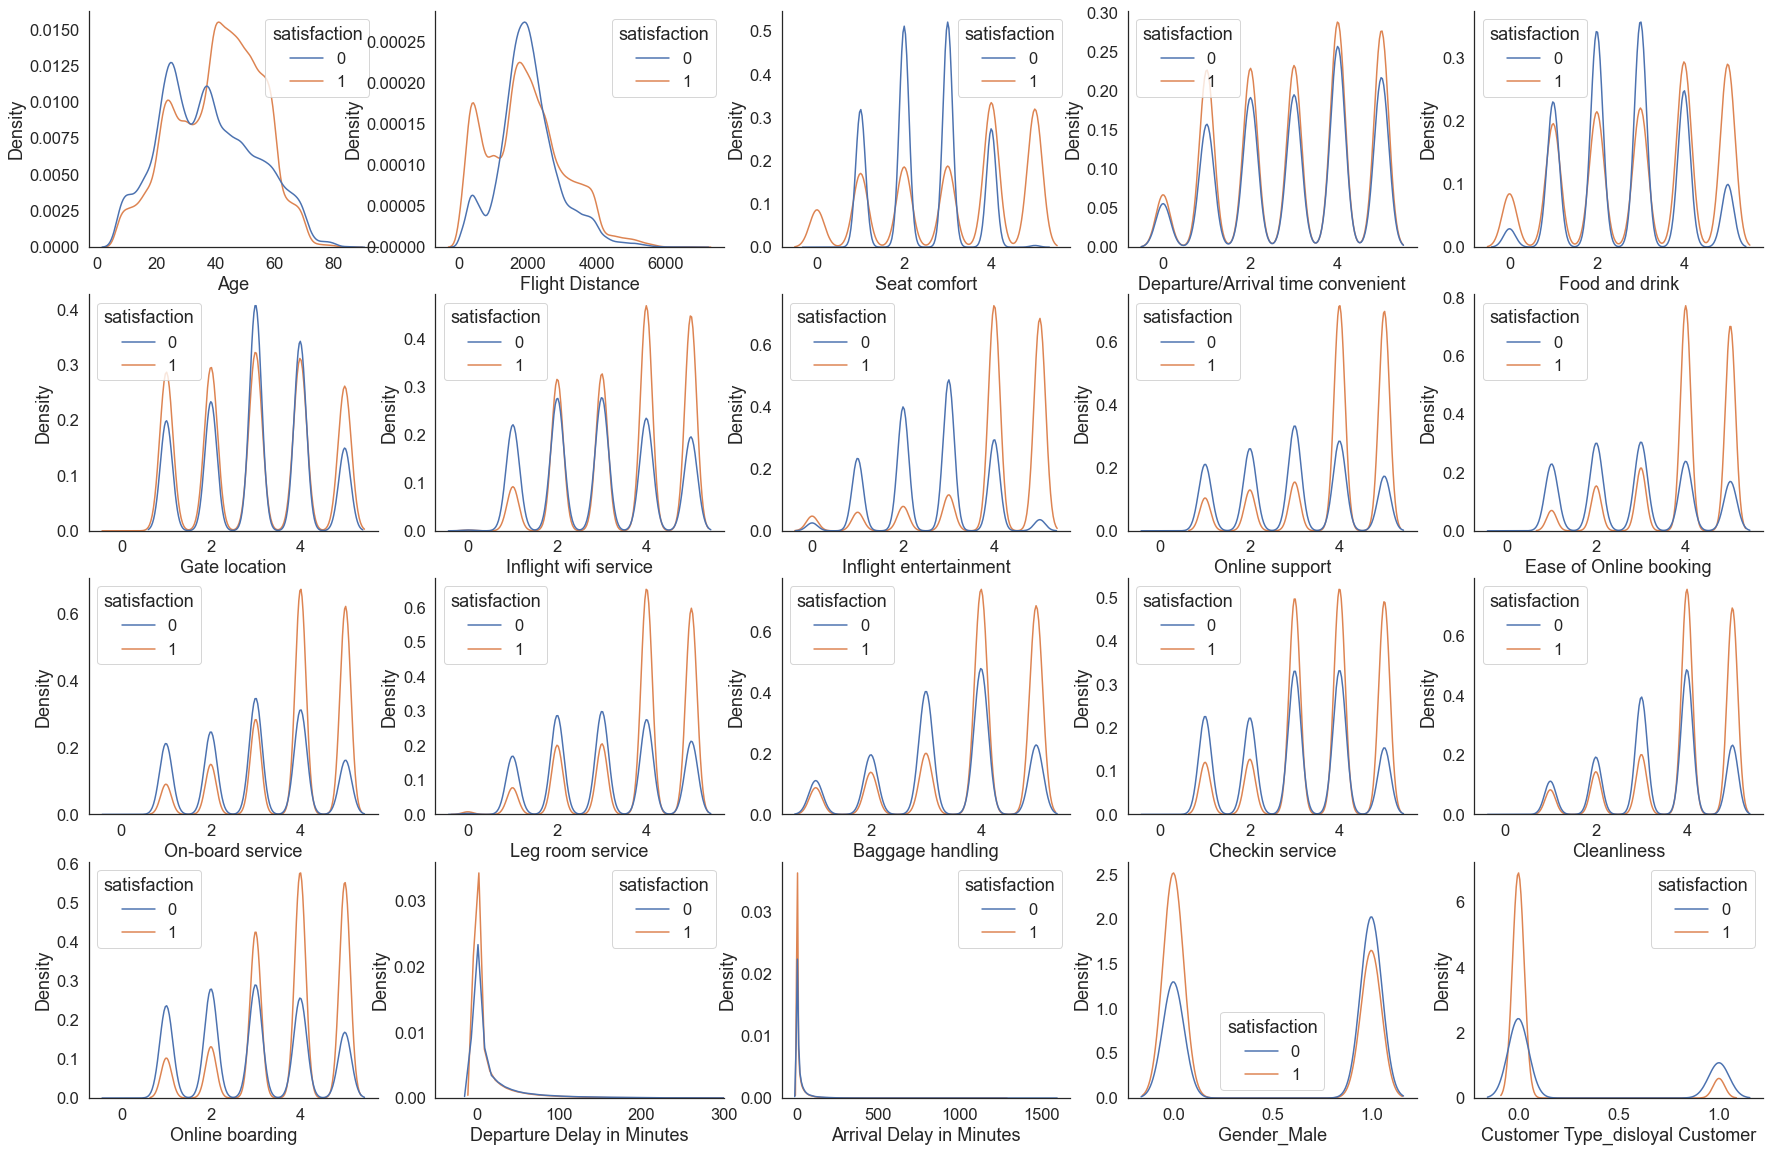

In [14]:
sns.set(style='white',font_scale=1.5)
fig = plt.figure(figsize=[30,20])
for i in range(20):
    fig.add_subplot(4, 5, i+1)
    sns.kdeplot(data=df1,x=df1.columns[i+1],hue='satisfaction')
    if i == 16:
        plt.xlim([-50,300])
    sns.despine()
    plt.savefig('kdeplot.png',transparent=True, bbox_inches='tight')

In [29]:
df1 = df1.drop('Gender_Male',axis=1)

Procedemos a borrar variables que no contribuyen o practicamente no son parte de la encuesta. y pósterior a ello se hace la la correlacion y asi mismo el mapa de correlacion, para saber que variables son fundamentales a la hora de cruzar y predecir con satisfaction

In [30]:
corr_matrix = df1.corr()
corr_matrix

,satisfaction,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Economy
satisfaction,1.000000,0.242384,0.120677,0.227062,0.523496,0.390143,0.431772,0.352047,0.304928,0.260347,0.266179,0.259330,0.338147,-0.073909,-0.080691,-0.292592,-0.109239,-0.311912
Seat comfort,0.242384,1.000000,0.715997,0.129131,0.426447,0.120278,0.211531,0.121149,0.136136,0.118489,0.041214,0.108475,0.130396,-0.023817,-0.025506,-0.042845,0.016839,0.033495
Food and drink,0.120677,0.715997,1.000000,0.025917,0.367669,0.028554,0.041189,0.038646,0.074161,0.036370,0.011898,0.033416,0.013587,-0.013433,-0.014881,-0.048725,-0.031751,-0.049622
Inflight wifi service,0.227062,0.129131,0.025917,1.000000,0.253823,0.557340,0.601100,0.060794,0.033589,0.038251,0.092508,0.038263,0.631786,-0.032900,-0.035270,-0.073400,-0.019321,-0.062784
Inflight entertainment,0.523496,0.426447,0.367669,0.253823,1.000000,0.441957,0.321731,0.183912,0.160731,0.117213,0.224120,0.109451,0.355714,-0.030491,-0.033321,-0.235757,-0.079576,-0.248224
Online support,0.390143,0.120278,0.028554,0.557340,0.441957,1.000000,0.617489,0.157930,0.138433,0.102444,0.206824,0.095726,0.669843,-0.034018,-0.036087,-0.186154,-0.039385,-0.184179
Ease of Online booking,0.431772,0.211531,0.041189,0.601100,0.321731,0.617489,1.000000,0.436264,0.355122,0.398322,0.137744,0.417675,0.684320,-0.036545,-0.039806,-0.149664,-0.025790,-0.133061
On-board service,0.352047,0.121149,0.038646,0.060794,0.183912,0.157930,0.436264,1.000000,0.411746,0.530448,0.250839,0.551294,0.139506,-0.037641,-0.041456,-0.085433,0.035899,-0.171893
Leg room service,0.304928,0.136136,0.074161,0.033589,0.160731,0.138433,0.355122,0.411746,1.000000,0.411640,0.167942,0.411505,0.112900,0.003660,0.000472,-0.097179,0.013896,-0.132781
Baggage handling,0.260347,0.118489,0.036370,0.038251,0.117213,0.102444,0.398322,0.530448,0.411640,1.000000,0.240858,0.631803,0.111920,-0.009985,-0.014164,-0.000639,0.048421,-0.130849


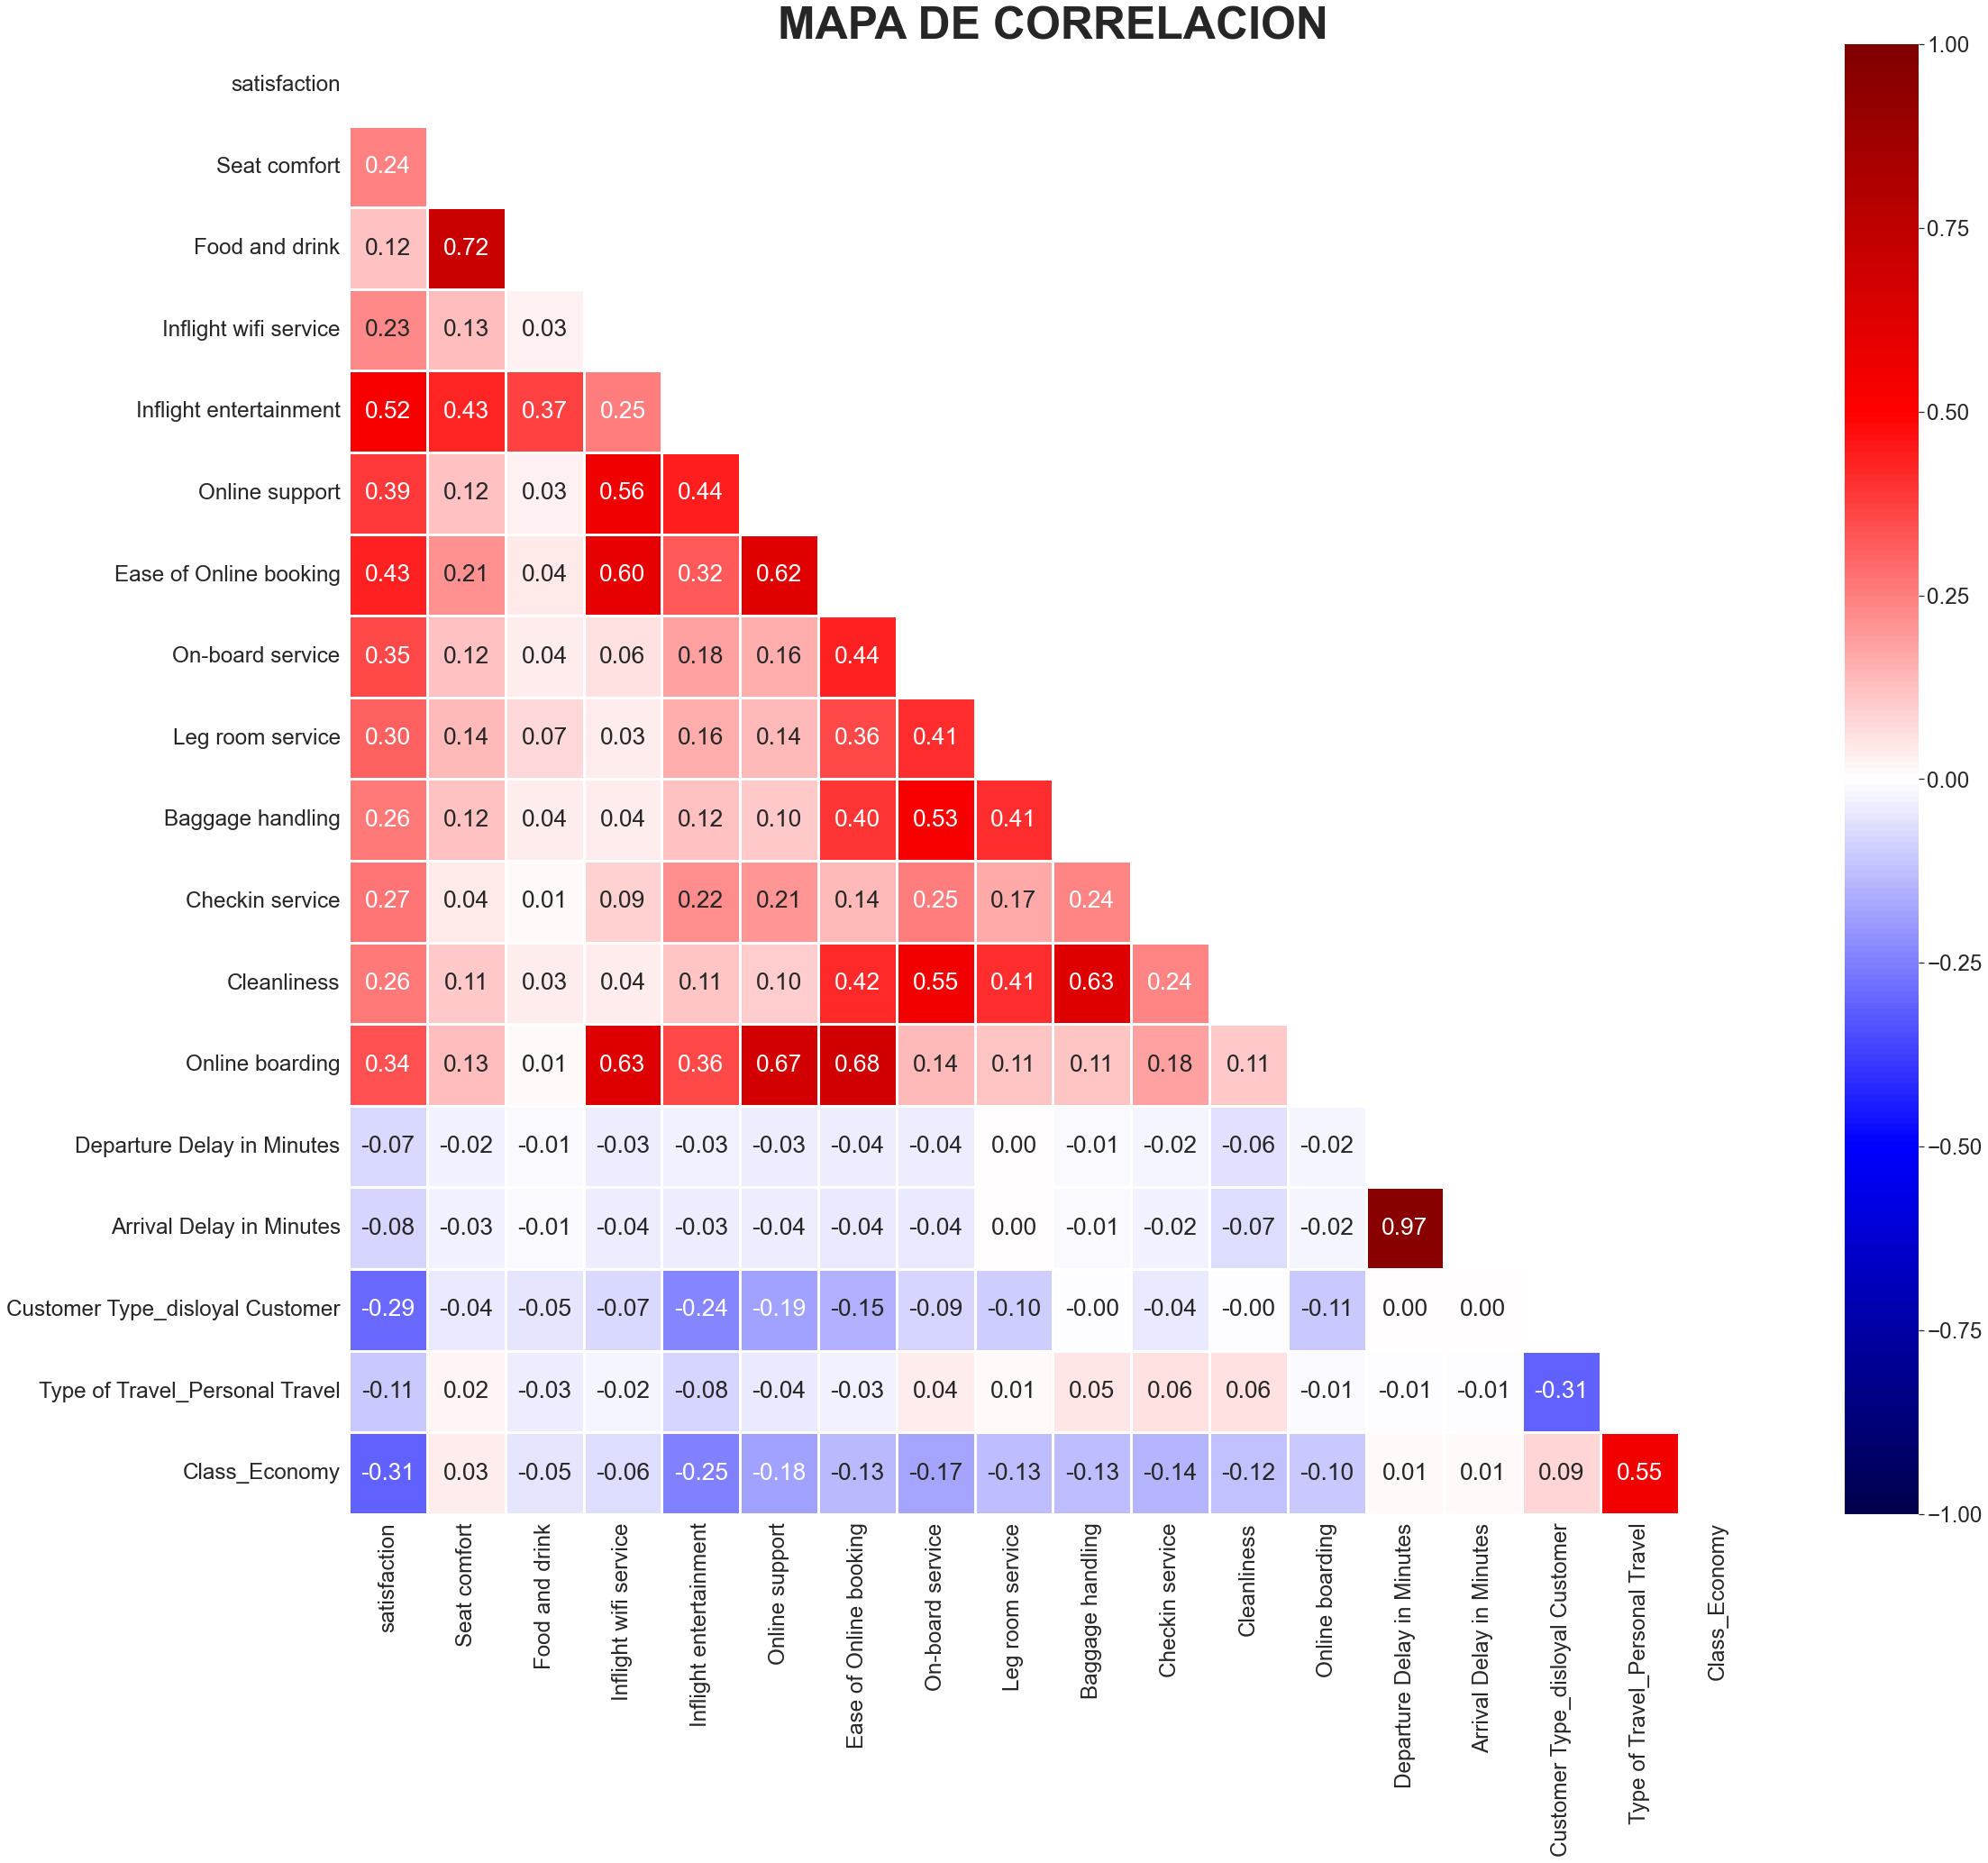

In [31]:
sns.set(style='white',font_scale=2.2)
fig = plt.figure(figsize=[35,30])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(150, 0, as_cmap=True)
sns.heatmap(corr_matrix,cmap='seismic',linewidth=3,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('MAPA DE CORRELACION', weight='bold',fontsize=50)
plt.savefig('heatmap.png',transparent=True, bbox_inches='tight')

EN EL MAPA DE CORRELACION PODEMOS DETERMINAR COMO UNAS CUENTAS VARIABLES SON FUNDAMENTRALES A LA HORA DE DETERMINAR LA SATISFACCION EN LOS CLIENTES. 

In [32]:
df1.head()

,satisfaction,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Economy
0,1,0,0,2,4,2,3,3,0,3,5,3,2,0.0,0.0,0,1,1
1,1,0,0,0,2,2,3,4,4,4,2,3,2,310.0,305.0,0,1,0
2,1,0,0,2,0,2,2,3,3,4,4,4,2,0.0,0.0,0,1,1
3,1,0,0,3,4,3,1,1,0,1,4,1,3,0.0,0.0,0,1,1
4,1,0,0,4,3,4,2,2,0,2,4,2,5,0.0,0.0,0,1,1


In [37]:
#df1 = df1.drop(['Flight Distance','Age','Gate location','Departure/Arrival time convenient'],axis=1)
#df1 = df1.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes'],axis=1)

Lo que hacemos es eliminar variables que segun las graficas kernel no nos servian, pero mas que ello que segun nuestro modelo y la naturaleza de los datos no nos sirven para modelar. Debido a que nuestro estudio va enfocado en una variable dummie, los modelos a aplicar especificamente son probit o logit, por ello al tener una variable dicotomica, ya que buscamos probabilidades para predecir si una persona estaria satisfecha o no dado ciertos atributos, en este caso dando ciertas atenciones en el servicio de la aerolinea. 
En este caso tomaremos el modelo logit, o modelo logistico; pero en este caso al igual que en problemas econometricos la teoria nos dice que para este tipo de variables para buscar la probabilidad ademas de los modelos probit y logit hay por lo menos 5 modelos que se ajustan a la naturaleza de estos datos, dentro de los cuales tambien podemos encontrar el guassiano, knn y el random forest. En este caso buscaremos solo haremos 2 y el modelo a evaluar sera el que mas precision tenga. 


## MODO 1

Modelo Logit o de regresion logistica. 

In [38]:
y = df1['satisfaction']
X = df1.drop('satisfaction',axis=1)

In [39]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

In [40]:
Cvec = np.linspace(0.001,2,100)
logit_model = LogisticRegressionCV(Cs = Cvec, cv=kf,max_iter=10000)
logit_model.fit(X_train_val, y_train_val)
logit_model.C_

array([0.06157576])

In [42]:
logit_model = LogisticRegression(C=logit_model.C_[0],max_iter=10000)
Mean_AUC_Logit_CV = np.mean(cross_val_score(logit_model, X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_Logit_CV

0.897757610466296

In [43]:
Mean_Precision_Logit_CV = np.mean(cross_val_score(logit_model, X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_Logit_CV

0.8386002188927826

In [44]:
Mean_Recall_Logit_CV = np.mean(cross_val_score(logit_model, X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_Logit_CV

0.841812060107799

In [45]:
X_train_val = X_train_val.reset_index().drop('index',axis=1)
y_train_val = y_train_val.reset_index().drop('index',axis=1)

Modelo ramdon forest.

In [55]:
score = []
for depth in range(8,13):
    f1 = np.mean(cross_val_score(RandomForestClassifier(max_depth=depth,random_state=42), X_train_val, y_train_val, cv=kf, scoring='f1'))
    score.append(f1)
    print(depth)
best_depth = list(range(8,13))[np.argmax(score)]  
best_f1 = max(score)
print('The best depth is {0} with f1-score of {1}'.format(best_depth,best_f1))

8
9
10
11
12
The best depth is 12 with f1-score of 0.9391806324978539


In [56]:
parameters = {'n_estimators':[170,200,230],'max_depth':[10,15,17],'random_state':[42]}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters,scoring='f1')
clf

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 17],
                         'n_estimators': [170, 200, 230],
                         'random_state': [42]},
             scoring='f1')

In [57]:
clf.fit(X_train_val, y_train_val)
clf.best_estimator_

RandomForestClassifier(max_depth=17, n_estimators=230, random_state=42)

In [58]:
clf.best_score_

0.95113431020952

In [59]:
Mean_AUC_forest_CV = np.mean(cross_val_score(RandomForestClassifier(max_depth=17,random_state=42), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_forest_CV

0.9893885672652594

In [61]:
Mean_Precision_forest_CV = np.mean(cross_val_score(RandomForestClassifier(max_depth=17,random_state=42), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_forest_CV

0.9576236426551109

In [62]:
Mean_Recall_forest_CV = np.mean(cross_val_score(RandomForestClassifier(max_depth=17,random_state=42), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_forest_CV

0.9434014191156871

Una vez tenemos los dos modelos, comparamos los valores, para ello los agrupamos en una tabla y asi ver que modelo se ajusta mejor a nuestros requierimientos.

In [63]:
Log_Model = LogisticRegression(C=0.04138384,max_iter=10000)
Forest_Model = RandomForestClassifier(max_depth=17,random_state=42)

model_list = [Log_Model,Forest_Model]
model_names = ["log_model",  "forest_model"]
model = list(zip(model_names, model_list))

In [65]:
model = ['Logistic Regression','Random Forest']
scoring = ['AUC','Precision','Recall']
model_name = ['Logit','forest']
model_list = []

for i in model:
    for j in scoring:
        model_dic = {'Model': i,'Scoring':j, 'Score':eval('Mean_{0}_{1}_CV'.format(j,model_name[model.index(i)]))}
        model_list.append(model_dic)

In [66]:
model_df = pd.DataFrame(model_list)
model_df

,Model,Scoring,Score
0,Logistic Regression,AUC,0.897758
1,Logistic Regression,Precision,0.838600
2,Logistic Regression,Recall,0.841812
3,Random Forest,AUC,0.989389
4,Random Forest,Precision,0.957624
5,Random Forest,Recall,0.943401


## RESULTADOS

Como podemos observar el modelo Random Forest es el modelo con mejor precision comparado con el Logito o regresion logistica. Es por ello que procedemos a evaluar nuestros datos con este modelo. 

## MODO VISTO CLASE

Cantidad de variables optimas 10
Las variables a tener en cuenta son: ['Seat comfort', 'Food and drink', 'Inflight entertainment', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Checkin service', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel', 'Class_Economy']


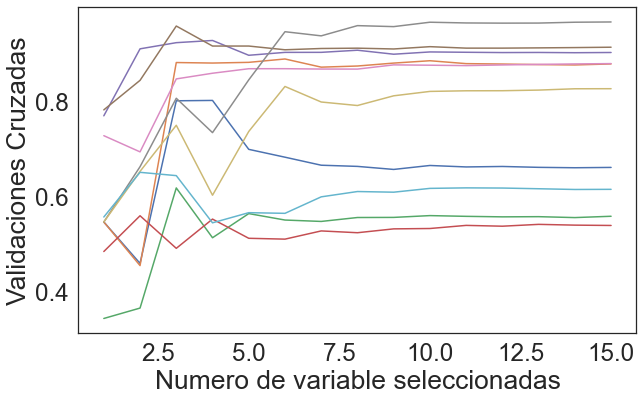

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

X= df1.drop(['satisfaction'], axis=1)
y= df1['satisfaction']


rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')

rfecv.fit(X,y)

print('Cantidad de variables optimas %d' % rfecv.n_features_)
print('Las variables a tener en cuenta son: %s' %list(X.columns[rfecv.support_]))

plt.figure(figsize=(10,6))
plt.xlabel("Numero de variable seleccionadas")
plt.ylabel('Validaciones Cruzadas')
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

In [48]:
variablesSeleccionadas = ['Seat comfort', 'Food and drink', 'Inflight entertainment', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Checkin service', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel', 'Class_Economy']

In [49]:
X = df1[variablesSeleccionadas]

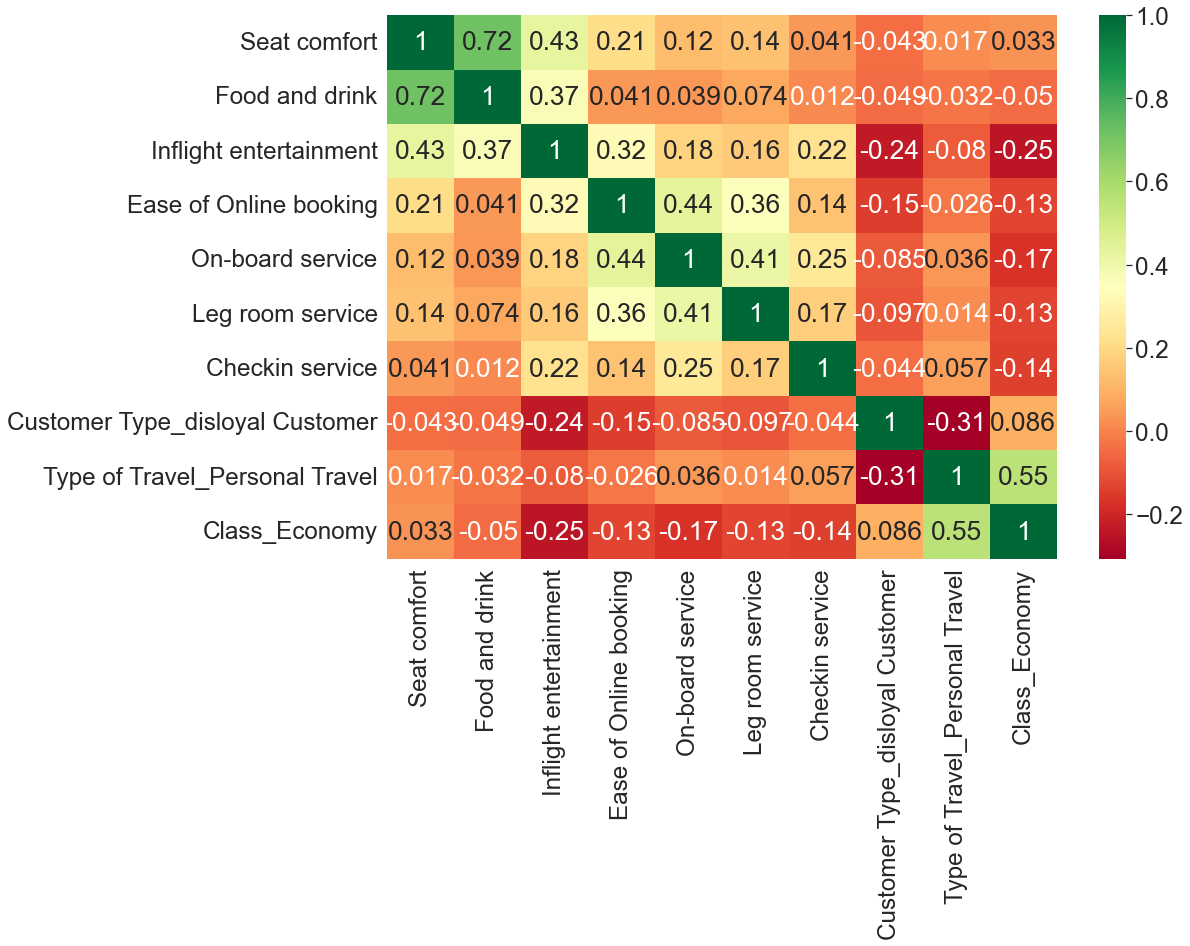

In [51]:
plt.subplots(figsize=(15,10))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df1[variablesSeleccionadas]
y= df1['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred

print('eficiencia del modelo', accuracy_score(y_test, y_pred))

eficiencia del modelo 0.8234139205420388


In [53]:
reporte = pd.DataFrame(classification_report(y_test, y_pred,  output_dict=True))
print(reporte)

                      0             1  accuracy     macro avg  weighted avg
precision      0.804467      0.838797  0.823414      0.821632      0.823368
recall         0.802056      0.840850  0.823414      0.821453      0.823414
f1-score       0.803260      0.839823  0.823414      0.821541      0.823389
support    11675.000000  14301.000000  0.823414  25976.000000  25976.000000


In [54]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[ 9364  2311]
 [ 2276 12025]]
